In [1]:
import os
import sys
import torch
import pytorch3d

In [2]:
# Params
data_dir = "objs"
dataset = "cub"
mesh_name = "mesh_0"
obj_filename = os.path.join(data_dir, f"{dataset}/{mesh_name}.obj")

In [6]:
# Setup
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

In [7]:
from pytorch3d.io import load_objs_as_meshes, load_obj

In [8]:
mesh = load_objs_as_meshes([obj_filename], device=device)

In [12]:
import matplotlib.pyplot as plt
from pytorch3d.vis.texture_vis import texturesuv_image_matplotlib

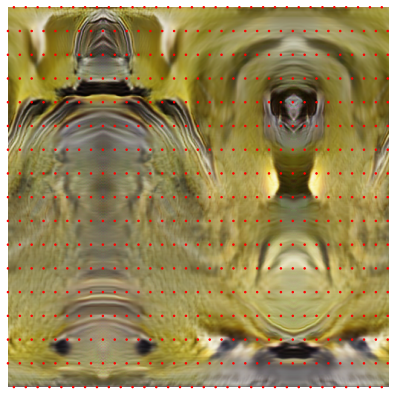

In [13]:
plt.figure(figsize=(7,7))
texturesuv_image_matplotlib(mesh.textures, subsample=None)
plt.grid("off");
plt.axis("off");

In [33]:
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras, 
    PointLights, 
    DirectionalLights, 
    Materials, 
    RasterizationSettings, 
    MeshRenderer, 
    MeshRasterizer,  
    SoftPhongShader,
    HardPhongShader,
    TexturesUV,
    TexturesVertex
)

In [34]:
R, T = look_at_view_transform(2.7, 0, 180) 
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

raster_settings = RasterizationSettings(
    image_size=512, 
    blur_radius=0.0, 
    faces_per_pixel=1, 
)

lights = PointLights(device=device, location=[[0.0, 0.0, -3.0]])

renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=cameras, 
        raster_settings=raster_settings
    ),
    shader=SoftPhongShader(
        device=device, 
        cameras=cameras,
        lights=lights
    )
)

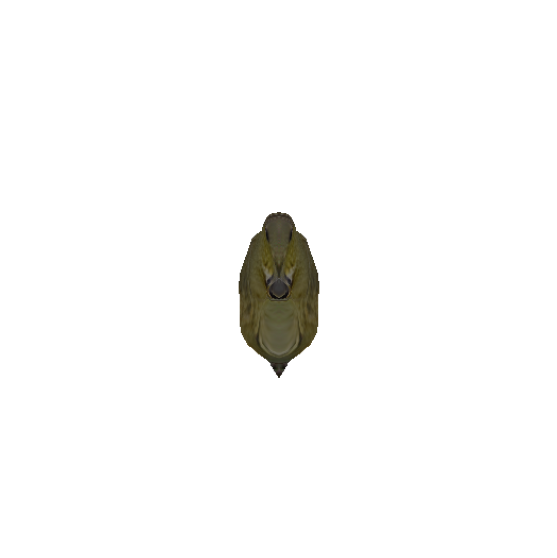

In [35]:
images = renderer(mesh)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.grid("off");
plt.axis("off");